# Imports

In [408]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from math import ceil
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor,LogisticRegression
from sklearn import metrics
matplotlib.rcParams['figure.figsize'] = (10, 4)

In [409]:
df = pd.read_csv("./data/HW3_movie_metadata.csv")
df

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


# Exploratory Data Analysis

In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4939 non-null   object 
 1   num_critic_for_reviews     4993 non-null   float64
 2   duration                   5028 non-null   float64
 3   director_facebook_likes    4939 non-null   float64
 4   actor_3_facebook_likes     5020 non-null   float64
 5   actor_2_name               5030 non-null   object 
 6   actor_1_facebook_likes     5036 non-null   float64
 7   gross                      4159 non-null   float64
 8   genres                     5043 non-null   object 
 9   actor_1_name               5036 non-null   object 
 10  movie_title                5043 non-null   object 
 11  num_voted_users            5043 non-null   int64  
 12  cast_total_facebook_likes  5043 non-null   int64  
 13  actor_3_name               5020 non-null   objec

In [411]:
df.describe(include="all")

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4939,4993.000000,5028.000000,4939.000000,5020.000000,5030,5036.000000,4.159000e+03,5043,5036,...,5022.000000,5031,5038,4740,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
unique,2398,NaN,NaN,NaN,NaN,3032,NaN,NaN,914,2097,...,NaN,47,65,18,NaN,NaN,NaN,NaN,NaN,NaN
top,Steven Spielberg,NaN,NaN,NaN,NaN,Morgan Freeman,NaN,NaN,Drama,Robert De Niro,...,NaN,English,USA,R,NaN,NaN,NaN,NaN,NaN,NaN
freq,26,NaN,NaN,NaN,NaN,20,NaN,NaN,236,49,...,NaN,4704,3807,2118,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,140.194272,107.201074,686.509212,645.009761,NaN,6560.047061,4.846841e+07,NaN,NaN,...,272.770808,NaN,NaN,NaN,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,NaN,121.601675,25.197441,2813.328607,1665.041728,NaN,15020.759120,6.845299e+07,NaN,NaN,...,377.982886,NaN,NaN,NaN,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,NaN,1.000000,7.000000,0.000000,0.000000,NaN,0.000000,1.620000e+02,NaN,NaN,...,1.000000,NaN,NaN,NaN,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,NaN,50.000000,93.000000,7.000000,133.000000,NaN,614.000000,5.340988e+06,NaN,NaN,...,65.000000,NaN,NaN,NaN,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,NaN,110.000000,103.000000,49.000000,371.500000,NaN,988.000000,2.551750e+07,NaN,NaN,...,156.000000,NaN,NaN,NaN,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,NaN,195.000000,118.000000,194.500000,636.000000,NaN,11000.000000,6.230944e+07,NaN,NaN,...,326.000000,NaN,NaN,NaN,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000


array([[<AxesSubplot:title={'center':'num_critic_for_reviews'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'director_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_3_facebook_likes'}>],
       [<AxesSubplot:title={'center':'actor_1_facebook_likes'}>,
        <AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'num_voted_users'}>,
        <AxesSubplot:title={'center':'cast_total_facebook_likes'}>],
       [<AxesSubplot:title={'center':'facenumber_in_poster'}>,
        <AxesSubplot:title={'center':'num_user_for_reviews'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'title_year'}>],
       [<AxesSubplot:title={'center':'actor_2_facebook_likes'}>,
        <AxesSubplot:title={'center':'imdb_score'}>,
        <AxesSubplot:title={'center':'aspect_ratio'}>,
        <AxesSubplot:title={'center':'movie_facebook_likes'}>]],
      dtype=object)

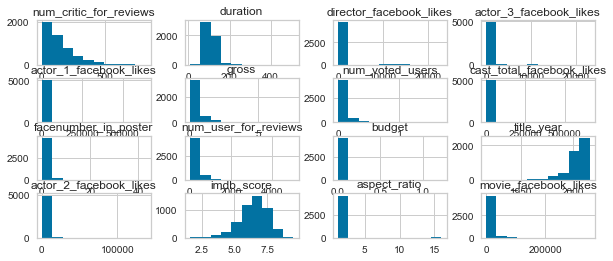

In [412]:
df.hist()

In [413]:
df["imdb_score"]

0       7.9
1       7.1
2       6.8
3       8.5
4       7.1
       ... 
5038    7.7
5039    7.5
5040    6.3
5041    6.3
5042    6.6
Name: imdb_score, Length: 5043, dtype: float64

# Preprocess Data

dropping na values for imbd_score

In [414]:
df = df.dropna(subset=["imdb_score"], axis=0)
df.isna().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

Remove the in-between imdb_score of low and high

In [415]:
df['imdb_score'] = pd.qcut(df['imdb_score'], [0, 0.4, 0.6, 1], labels=[0,-1,1])
df = df.drop(df[df["imdb_score"] == -1].index)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


array([[<AxesSubplot:title={'center':'actor_1_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_2_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_3_facebook_likes'}>,
        <AxesSubplot:title={'center':'aspect_ratio'}>],
       [<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'cast_total_facebook_likes'}>,
        <AxesSubplot:title={'center':'director_facebook_likes'}>,
        <AxesSubplot:title={'center':'duration'}>],
       [<AxesSubplot:title={'center':'facenumber_in_poster'}>,
        <AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'movie_facebook_likes'}>,
        <AxesSubplot:title={'center':'num_critic_for_reviews'}>],
       [<AxesSubplot:title={'center':'num_user_for_reviews'}>,
        <AxesSubplot:title={'center':'num_voted_users'}>,
        <AxesSubplot:title={'center':'title_year'}>, <AxesSubplot:>]],
      dtype=object)

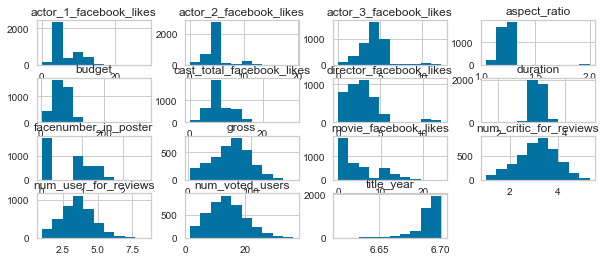

In [416]:
y = df["imdb_score"]
X = df[df.columns.difference(["imdb_score"])]
X[list(X._get_numeric_data().columns)] = X[list(X._get_numeric_data().columns)].pow(1/4)
X.hist()

In [417]:
y.head()

0    1
1    1
3    1
4    1
6    0
Name: imdb_score, dtype: category
Categories (3, int64): [0 < -1 < 1]

In [418]:
X.skew().sort_values()

title_year                  -2.314518
duration                    -0.613130
num_critic_for_reviews      -0.249052
facenumber_in_poster        -0.049683
gross                       -0.017354
num_user_for_reviews         0.330804
num_voted_users              0.407429
cast_total_facebook_likes    0.560907
actor_3_facebook_likes       0.723280
budget                       0.799051
actor_1_facebook_likes       0.809816
movie_facebook_likes         0.896084
actor_2_facebook_likes       1.269669
director_facebook_likes      1.583038
aspect_ratio                 6.427998
dtype: float64

In [419]:
X.isna().sum().sort_values(ascending=False) / len(X) * 100

gross                        19.080403
budget                       10.130317
aspect_ratio                  6.810917
content_rating                6.466683
plot_keywords                 3.319400
title_year                    2.434227
director_facebook_likes       2.335874
director_name                 2.335874
num_critic_for_reviews        1.180231
num_user_for_reviews          0.491763
actor_3_facebook_likes        0.491763
actor_3_name                  0.491763
facenumber_in_poster          0.319646
duration                      0.319646
actor_2_name                  0.295058
actor_2_facebook_likes        0.295058
language                      0.245881
actor_1_name                  0.147529
actor_1_facebook_likes        0.147529
country                       0.098353
genres                        0.000000
movie_facebook_likes          0.000000
movie_imdb_link               0.000000
movie_title                   0.000000
cast_total_facebook_likes     0.000000
num_voted_users          

# Train Test Split

In [420]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

,actor_1_facebook_likes,actor_1_name,actor_2_facebook_likes,actor_2_name,actor_3_facebook_likes,actor_3_name,aspect_ratio,budget,cast_total_facebook_likes,content_rating,...,gross,language,movie_facebook_likes,movie_imdb_link,movie_title,num_critic_for_reviews,num_user_for_reviews,num_voted_users,plot_keywords,title_year
4797,4.358899,Tony Doupe,1.934336,Sue Corcoran,1.565085,David Frederick White,1.155061,17.782794,4.435348,NaN,...,10.422025,English,2.498999,http://www.imdb.com/title/tt0396041/?ref_=fn_t...,Gory Gory Hallelujah,1.681793,2.059767,3.657744,conspiracy|feminist|hippie|motorcycle|slapstic...,6.689909
890,4.983923,James Mason,4.376899,Shelley Winters,3.647483,Lois Maxwell,1.135081,37.606031,6.120183,Not Rated,...,NaN,English,0.000000,http://www.imdb.com/title/tt0056193/?ref_=fn_t...,Lolita,3.185733,3.793085,16.137738,lolita|nymphet|older man young girl relationsh...,6.655409
719,6.687403,Natascha McElhone,4.983923,Noah Emmerich,4.898979,Peter Krause,1.166253,88.011174,7.798153,PG,...,105.864491,English,11.582922,http://www.imdb.com/title/tt0120382/?ref_=fn_t...,The Truman Show,3.820277,5.441892,28.588499,controlled environment|fictional reality show|...,6.685731
400,10.241137,Brad Pitt,5.623413,Bernie Mac,4.658598,Elliott Gould,1.238132,96.018459,10.683645,PG-13,...,116.373273,English,0.000000,http://www.imdb.com/title/tt0240772/?ref_=fn_t...,Ocean's Eleven,3.692991,5.391557,25.190140,card dealer|casino|criminal mastermind|recruit...,6.688239
2950,4.610888,Talia Shire,3.323456,Richard Dysart,2.981308,Robert Foxworth,1.238132,58.856619,5.196152,PG,...,NaN,English,5.480266,http://www.imdb.com/title/tt0079758/?ref_=fn_t...,Prophecy,2.892508,2.942831,7.400828,cabin|monster|monster movie|paper mill|pollution,6.669779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3350,5.572105,Ranbir Kapoor,4.844934,Madhuri Dixit,4.518913,Aditya Roy Kapoor,NaN,NaN,6.962528,Not Rated,...,44.231110,Hindi,0.000000,http://www.imdb.com/title/tt2178470/?ref_=fn_t...,Yeh Jawaani Hai Deewani,2.236068,3.177972,12.589647,jealousy|jumping into sea|love|swimming pool|w...,6.698244
4239,5.197933,Kelli Garner,5.045378,Nick Stahl,4.844934,Brad Renfro,1.166253,NaN,7.575267,R,...,26.724656,English,0.000000,http://www.imdb.com/title/tt0242193/?ref_=fn_t...,Bully,2.952592,4.281390,13.097109,cruelty|friend|male frontal nudity|male nudity...,6.688239
3048,4.429607,Ryan O'Neal,4.137299,Steven Berkoff,3.245867,Hardy Krüger,1.135081,57.590145,5.764243,PG,...,NaN,English,0.000000,http://www.imdb.com/title/tt0072684/?ref_=fn_t...,Barry Lyndon,3.336994,4.382850,17.854688,18th century|england|rise and fall|rural setti...,6.666406
2747,5.623413,Stephen Graham,3.584025,Gael Le Cornec,2.850270,Keith Allen,1.166253,62.233298,5.940081,R,...,11.948160,English,4.592932,http://www.imdb.com/title/tt0484111/?ref_=fn_t...,The Good Night,2.659148,2.498999,9.311937,commercial|dream|dreaming|girl|new york city,6.693247


# Fill na values

In [421]:
X_train_median = X_train.select_dtypes(include='number').median()
X_train_mode = X_train.select_dtypes(include='object').mode().iloc[0]
X_train = X_train.fillna(X_train_median)
X_train = X_train.fillna(X_train_mode)
X_test = X_test.fillna(X_train_median)
X_test = X_test.fillna(X_train_mode)
X_train.isna().sum() + X_test.isna().sum()


actor_1_facebook_likes       0
actor_1_name                 0
actor_2_facebook_likes       0
actor_2_name                 0
actor_3_facebook_likes       0
actor_3_name                 0
aspect_ratio                 0
budget                       0
cast_total_facebook_likes    0
content_rating               0
country                      0
director_facebook_likes      0
director_name                0
duration                     0
facenumber_in_poster         0
genres                       0
gross                        0
language                     0
movie_facebook_likes         0
movie_imdb_link              0
movie_title                  0
num_critic_for_reviews       0
num_user_for_reviews         0
num_voted_users              0
plot_keywords                0
title_year                   0
dtype: int64

### Drop features

#### Dropping unnecessary columns such as imdb link, names

In [422]:
to_drop = [
           "actor_1_name",
           "actor_2_name",
           "actor_3_name",
           "director_name",
           "movie_imdb_link",
           "movie_title"
]
X_train.drop(to_drop, axis=1, inplace=True)
X_test.drop(to_drop, axis=1, inplace=True)
X_train.dtypes

actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes    float64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
genres                        object
gross                        float64
language                      object
movie_facebook_likes         float64
num_critic_for_reviews       float64
num_user_for_reviews         float64
num_voted_users              float64
plot_keywords                 object
title_year                   float64
dtype: object

Lets take a look at some interesting features

#### Language

In [423]:
value_counts = X_train["language"].value_counts()
value_counts

English       3026
French          50
Hindi           24
Spanish         21
Mandarin        15
Japanese        13
German          12
Italian         10
Korean           8
Russian          8
Cantonese        6
Portuguese       6
Persian          4
Hebrew           4
Dutch            4
Danish           4
Chinese          3
Swedish          3
Polish           3
Arabic           3
Indonesian       2
Thai             2
Norwegian        2
Zulu             2
Dari             2
Icelandic        2
Hungarian        1
Kannada          1
Vietnamese       1
Urdu             1
Greek            1
Kazakh           1
Aboriginal       1
Bosnian          1
Maya             1
Telugu           1
Swahili          1
None             1
Czech            1
Aramaic          1
Name: language, dtype: int64

<AxesSubplot:xlabel='language', ylabel='count'>

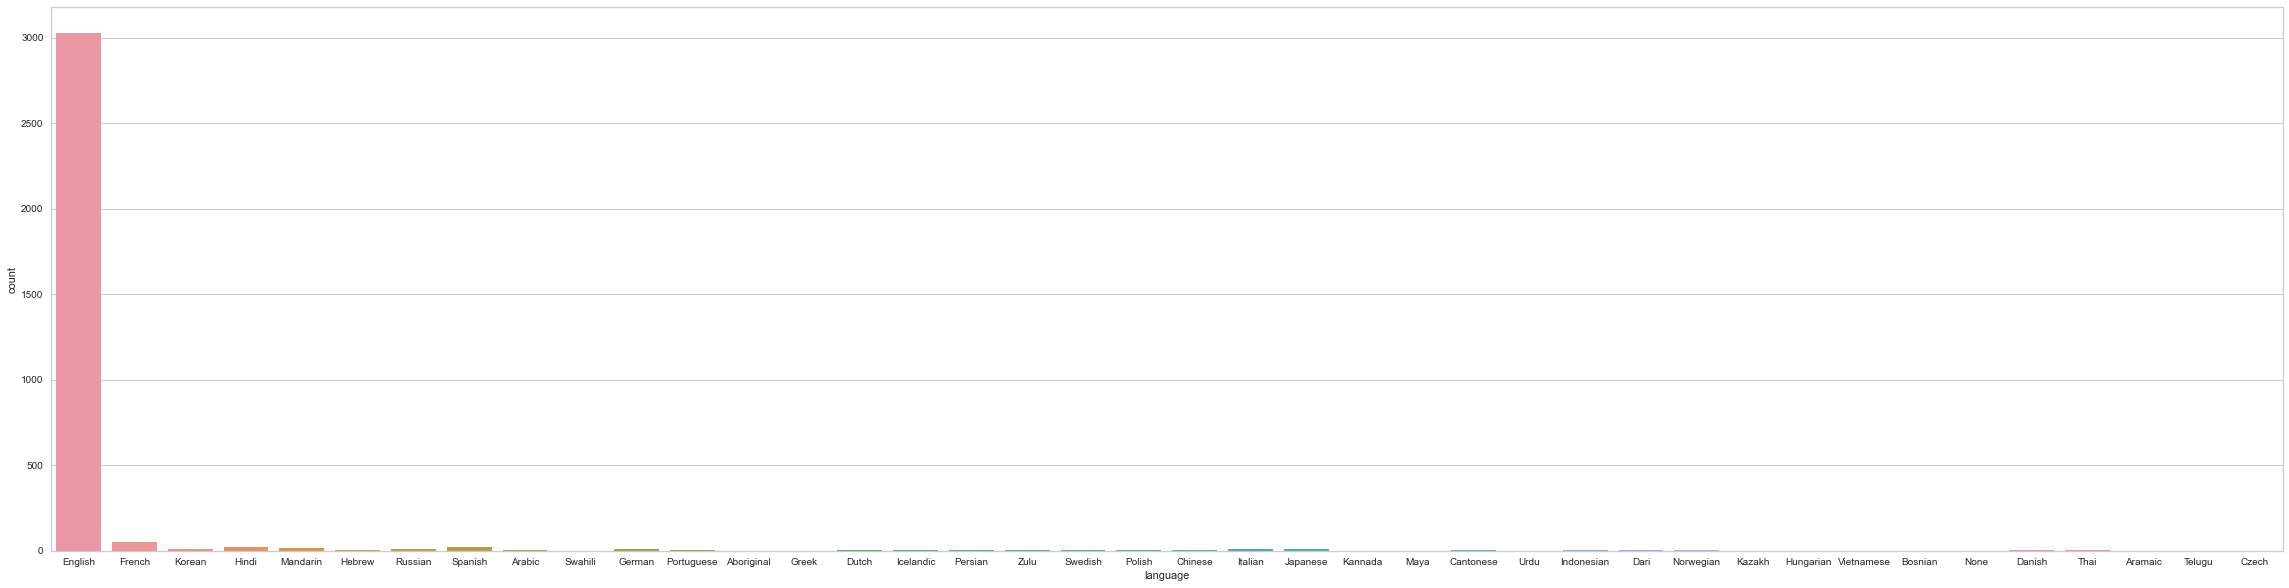

In [424]:
plt.figure(figsize=(40,10))
sns.countplot(x="language", data=X_train)

View columns in percentage

In [425]:
X_train['language'].value_counts(normalize=True) * 100

English       93.021826
French         1.537043
Hindi          0.737781
Spanish        0.645558
Mandarin       0.461113
Japanese       0.399631
German         0.368890
Italian        0.307409
Korean         0.245927
Russian        0.245927
Cantonese      0.184445
Portuguese     0.184445
Persian        0.122963
Hebrew         0.122963
Dutch          0.122963
Danish         0.122963
Chinese        0.092223
Swedish        0.092223
Polish         0.092223
Arabic         0.092223
Indonesian     0.061482
Thai           0.061482
Norwegian      0.061482
Zulu           0.061482
Dari           0.061482
Icelandic      0.061482
Hungarian      0.030741
Kannada        0.030741
Vietnamese     0.030741
Urdu           0.030741
Greek          0.030741
Kazakh         0.030741
Aboriginal     0.030741
Bosnian        0.030741
Maya           0.030741
Telugu         0.030741
Swahili        0.030741
None           0.030741
Czech          0.030741
Aramaic        0.030741
Name: language, dtype: float64

English accounts for 93.03%, this data is unusable since it's heavily skewed. Dropping this data is the best option

In [426]:
X_train = X_train.drop("language", axis=1)
X_test = X_test.drop("language", axis=1)
X_train.dtypes

actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes    float64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
genres                        object
gross                        float64
movie_facebook_likes         float64
num_critic_for_reviews       float64
num_user_for_reviews         float64
num_voted_users              float64
plot_keywords                 object
title_year                   float64
dtype: object

#### Country

In [427]:
value_counts = X_train["country"].value_counts()
value_counts

USA                   2430
UK                     291
France                 100
Canada                  81
Germany                 70
Australia               36
India                   29
Spain                   23
Italy                   20
China                   18
Japan                   16
South Korea             12
Hong Kong               11
New Zealand              8
Denmark                  8
Russia                   8
Mexico                   7
Ireland                  6
Brazil                   6
South Africa             5
Netherlands              5
Norway                   5
Sweden                   4
Belgium                  3
Israel                   3
Argentina                3
Poland                   3
Iran                     3
Thailand                 3
Iceland                  3
West Germany             3
Czech Republic           2
Aruba                    1
Georgia                  1
Philippines              1
Switzerland              1
Afghanistan              1
H

View country in percentage

In [428]:
value_counts = X_train["country"].value_counts() / X_train.shape[0] * 100
value_counts

USA                   74.700277
UK                     8.945589
France                 3.074085
Canada                 2.490009
Germany                2.151860
Australia              1.106671
India                  0.891485
Spain                  0.707040
Italy                  0.614817
China                  0.553335
Japan                  0.491854
South Korea            0.368890
Hong Kong              0.338149
New Zealand            0.245927
Denmark                0.245927
Russia                 0.245927
Mexico                 0.215186
Ireland                0.184445
Brazil                 0.184445
South Africa           0.153704
Netherlands            0.153704
Norway                 0.153704
Sweden                 0.122963
Belgium                0.092223
Israel                 0.092223
Argentina              0.092223
Poland                 0.092223
Iran                   0.092223
Thailand               0.092223
Iceland                0.092223
West Germany           0.092223
Czech Re

<AxesSubplot:xlabel='country', ylabel='count'>

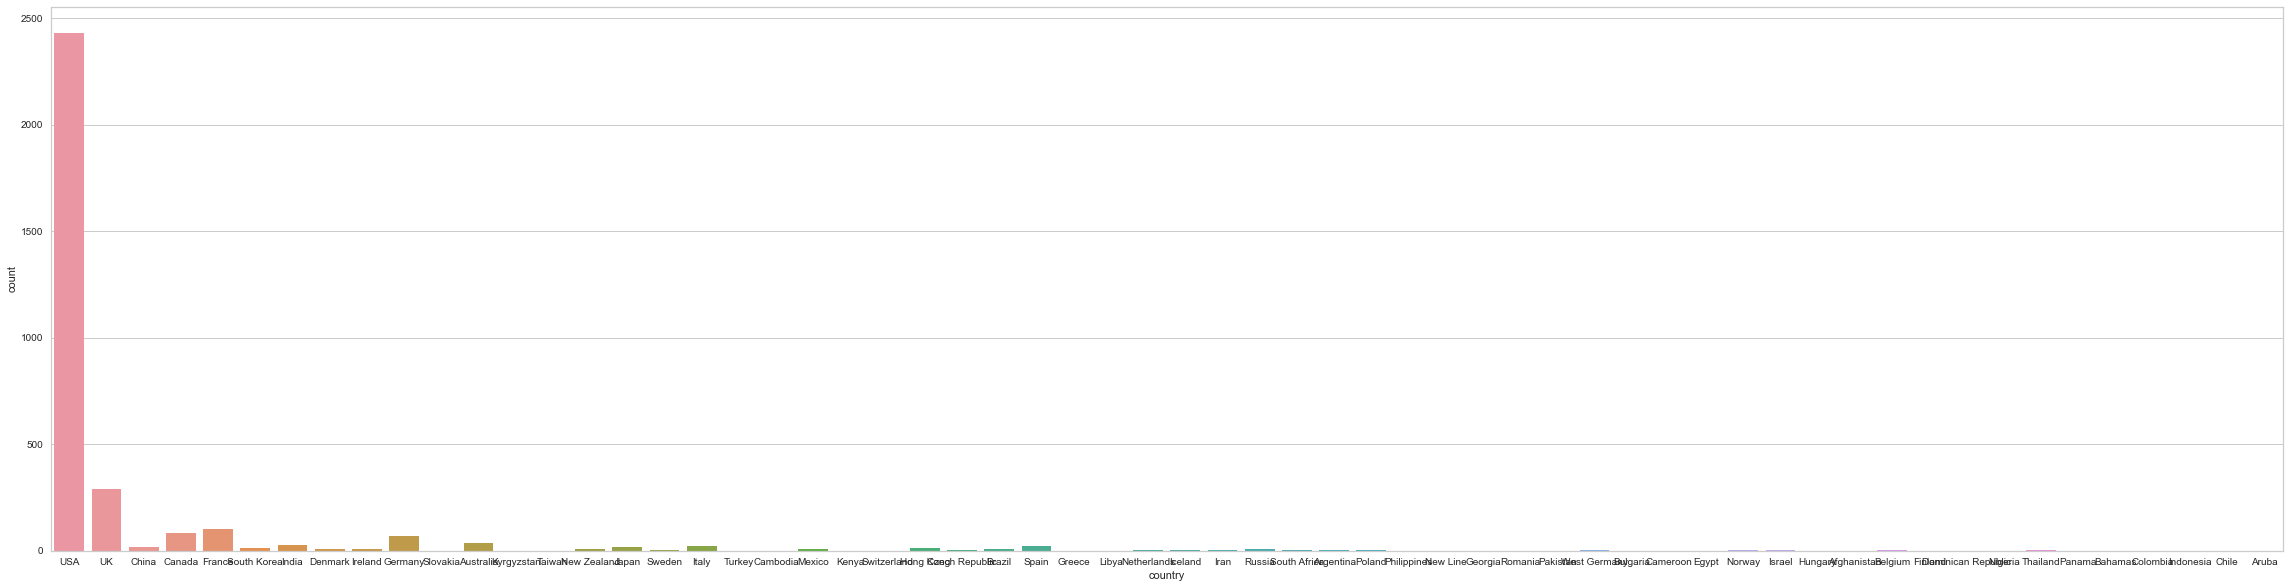

In [429]:
plt.figure(figsize=(40,10))
sns.countplot(x="country", data=X_train)

The 3 dominant countries are USA, UK, and France. Other countries should be recognized as "other" as it's less relevant than the 3

In [430]:
def process_country(X):
  top_three = ["USA","UK","France"]
  X["country"] = X["country"].where(X["country"].isin(top_three), "others")
  return X
X_train = process_country(X_train)
X_test = process_country(X_test)
X_train

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,aspect_ratio,budget,cast_total_facebook_likes,content_rating,country,director_facebook_likes,duration,facenumber_in_poster,genres,gross,movie_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,plot_keywords,title_year
4797,4.358899,1.934336,1.565085,1.155061,17.782794,4.435348,R,USA,1.934336,3.130169,1.189207,Comedy|Fantasy|Horror|Musical,10.422025,2.498999,1.681793,2.059767,3.657744,conspiracy|feminist|hippie|motorcycle|slapstic...,6.689909
890,4.983923,4.376899,3.647483,1.135081,37.606031,6.120183,Not Rated,UK,0.000000,3.511243,0.000000,Crime|Drama|Romance,70.840314,0.000000,3.185733,3.793085,16.137738,lolita|nymphet|older man young girl relationsh...,6.655409
719,6.687403,4.983923,4.898979,1.166253,88.011174,7.798153,PG,USA,4.965648,3.185733,1.000000,Comedy|Drama|Sci-Fi,105.864491,11.582922,3.820277,5.441892,28.588499,controlled environment|fictional reality show|...,6.685731
400,10.241137,5.623413,4.658598,1.238132,96.018459,10.683645,PG-13,USA,0.000000,3.281818,1.414214,Crime|Thriller,116.373273,0.000000,3.692991,5.391557,25.190140,card dealer|casino|criminal mastermind|recruit...,6.688239
2950,4.610888,3.323456,2.981308,1.238132,58.856619,5.196152,PG,USA,4.115954,3.177972,1.000000,Horror|Sci-Fi,70.840314,5.480266,2.892508,2.942831,7.400828,cabin|monster|monster movie|paper mill|pollution,6.669779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3350,5.572105,4.844934,4.518913,1.238132,66.706215,6.962528,Not Rated,others,0.000000,3.556559,1.189207,Comedy|Drama|Musical|Romance,44.231110,0.000000,2.236068,3.177972,12.589647,jealousy|jumping into sea|love|swimming pool|w...,6.698244
4239,5.197933,5.045378,4.844934,1.166253,66.706215,7.575267,R,USA,3.683023,3.274722,0.000000,Biography|Crime|Drama,26.724656,0.000000,2.952592,4.281390,13.097109,cruelty|friend|male frontal nudity|male nudity...,6.688239
3048,4.429607,4.137299,3.245867,1.135081,57.590145,5.764243,PG,UK,0.000000,3.683023,0.000000,Adventure|Drama|History|War,70.840314,0.000000,3.336994,4.382850,17.854688,18th century|england|rise and fall|rural setti...,6.666406
2747,5.623413,3.584025,2.850270,1.166253,62.233298,5.940081,R,USA,2.030543,3.105423,1.000000,Comedy|Drama|Fantasy|Music|Romance,11.948160,4.592932,2.659148,2.498999,9.311937,commercial|dream|dreaming|girl|new york city,6.693247


#### Genres

<AxesSubplot:xlabel='genres', ylabel='count'>

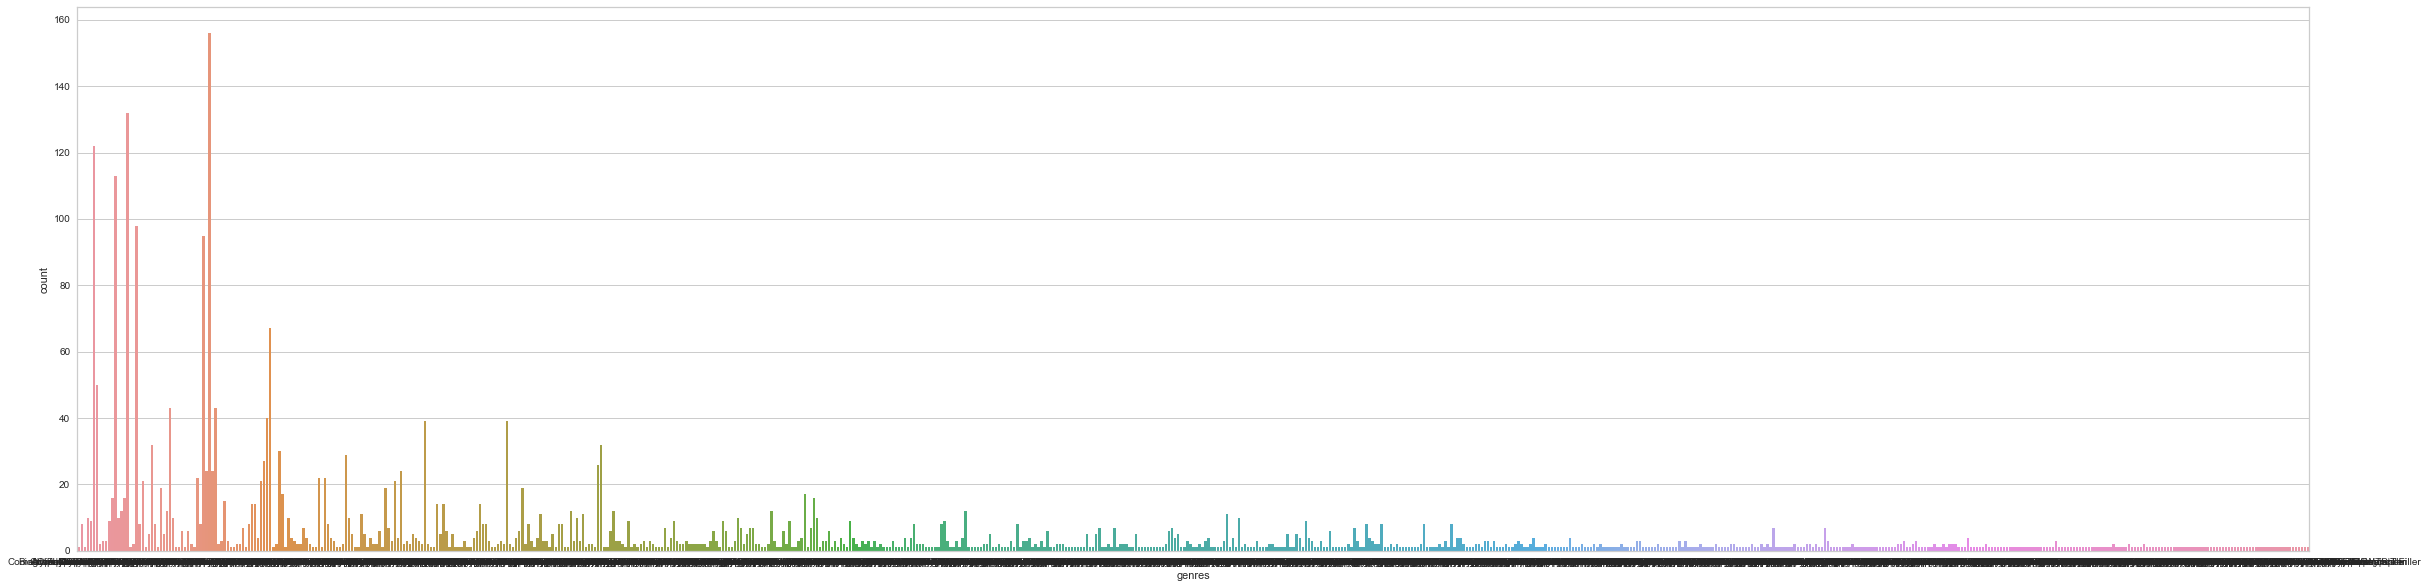

In [431]:
plt.figure(figsize=(40,10))
sns.countplot(x=X_train.genres) 

Genres are too complicated and interconnected, dropping this data as for right now

In [432]:
X_train = X_train.drop("genres", axis=1)
X_test = X_test.drop("genres",axis=1)
X_train.dtypes

actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes    float64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
gross                        float64
movie_facebook_likes         float64
num_critic_for_reviews       float64
num_user_for_reviews         float64
num_voted_users              float64
plot_keywords                 object
title_year                   float64
dtype: object

#### Content Rating

View content rating in percentage

In [433]:
value_counts = X_train["content_rating"].value_counts() / X_train.shape[0] * 100
value_counts

R            47.094989
PG-13        28.896403
PG           14.079311
Not Rated     2.490009
G             2.490009
Unrated       1.229634
Approved      1.137412
TV-14         0.676299
TV-MA         0.522595
X             0.307409
TV-PG         0.276668
Passed        0.215186
TV-G          0.215186
M             0.122963
NC-17         0.092223
GP            0.092223
TV-Y7         0.030741
TV-Y          0.030741
Name: content_rating, dtype: float64

<AxesSubplot:xlabel='content_rating', ylabel='count'>

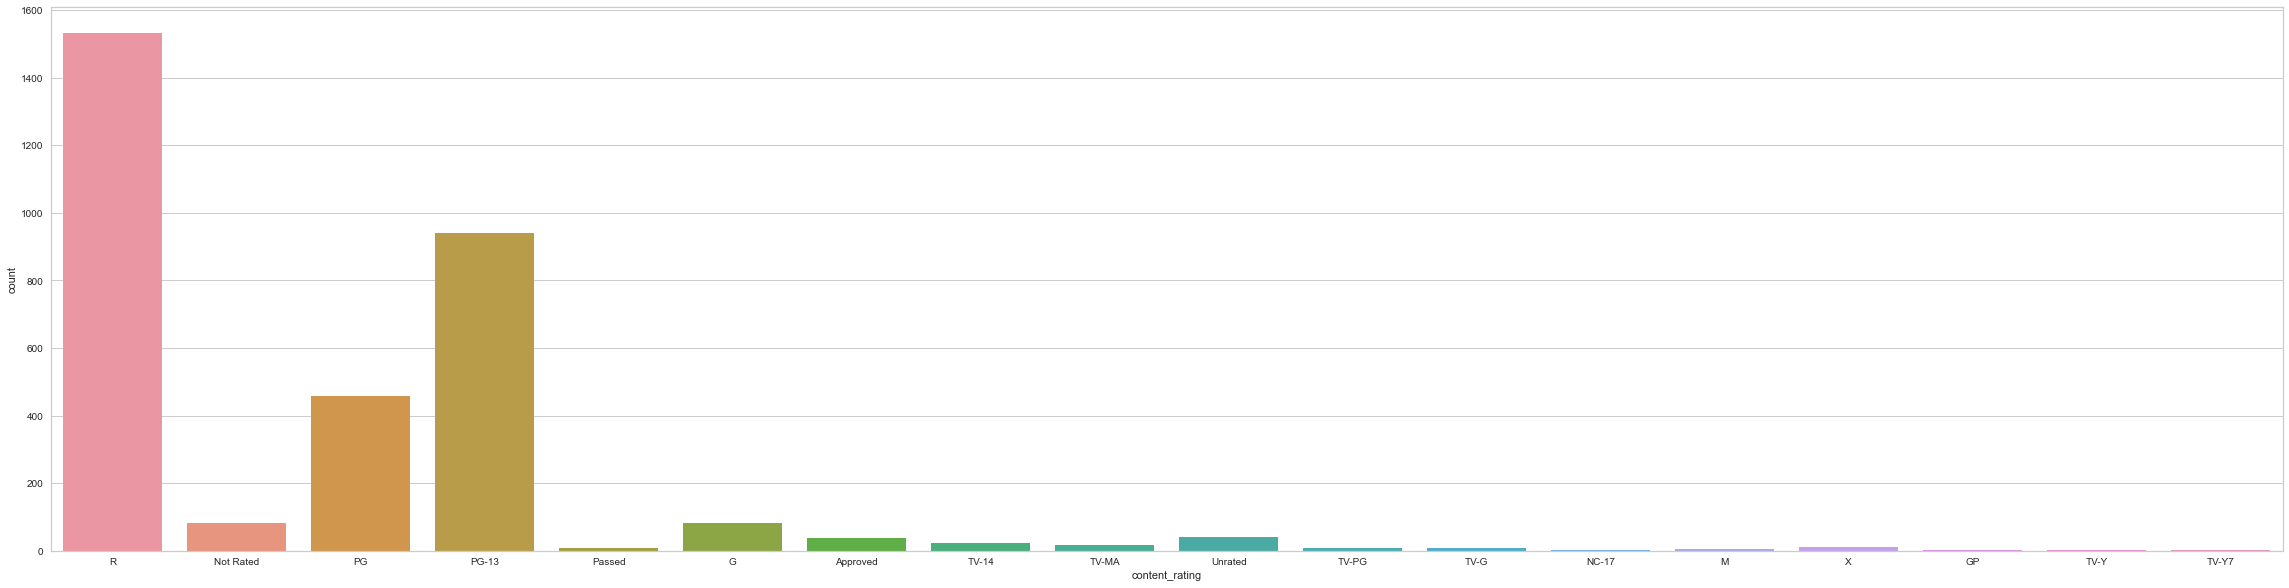

In [434]:
plt.figure(figsize=(40,10))
sns.countplot(x="content_rating", data=X_train)

R, PG, PG-13 are the 3 most dominant values in rating. Group the rest as "others"

In [435]:
def process_content_rating(X):
  top_three = ["R","PG", "PG-13"]
  X["content_rating"] = X["content_rating"].where(X["content_rating"].isin(top_three), "others")
  return X
X_train = process_content_rating(X_train)
X_test = process_content_rating(X_test)
X_train["content_rating"]

4797         R
890     others
719         PG
400      PG-13
2950        PG
         ...  
3350    others
4239         R
3048        PG
2747         R
297     others
Name: content_rating, Length: 3253, dtype: object

In [436]:
X_train.dtypes

actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes    float64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
gross                        float64
movie_facebook_likes         float64
num_critic_for_reviews       float64
num_user_for_reviews         float64
num_voted_users              float64
plot_keywords                 object
title_year                   float64
dtype: object

#### Plot keywords

In [437]:
value_counts = X_train["plot_keywords"].value_counts()
value_counts

1940s|child hero|fantasy world|orphan|reference to peter pan                                    105
assistant|experiment|frankenstein|medical student|scientist                                       3
based on novel                                                                                    3
crematorium|female frontal nudity|naked dead woman|paramedic|poison gas                           2
audition|friendship|graduation|high school graduation|love                                        2
                                                                                               ... 
apartment|hello kitty|school|teacher|water                                                        1
battle|demon|magic|secret|warrior                                                                 1
conspiracy|cynicism|false promise of the american dream|male full frontal nudity|male nudity      1
castle thunder|document|neighborhood|punctuation in title|villain arrested                        1


In [438]:
#sns.countplot(x="plot_keywords", data=X_train)

Same as genres, data is too complex and interconnected. Dropping this value

In [439]:
X_train = X_train.drop("plot_keywords", axis=1)
X_test = X_test.drop("plot_keywords", axis=1)
X_train.dtypes

actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes    float64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
gross                        float64
movie_facebook_likes         float64
num_critic_for_reviews       float64
num_user_for_reviews         float64
num_voted_users              float64
title_year                   float64
dtype: object

### Correlation

<AxesSubplot:>

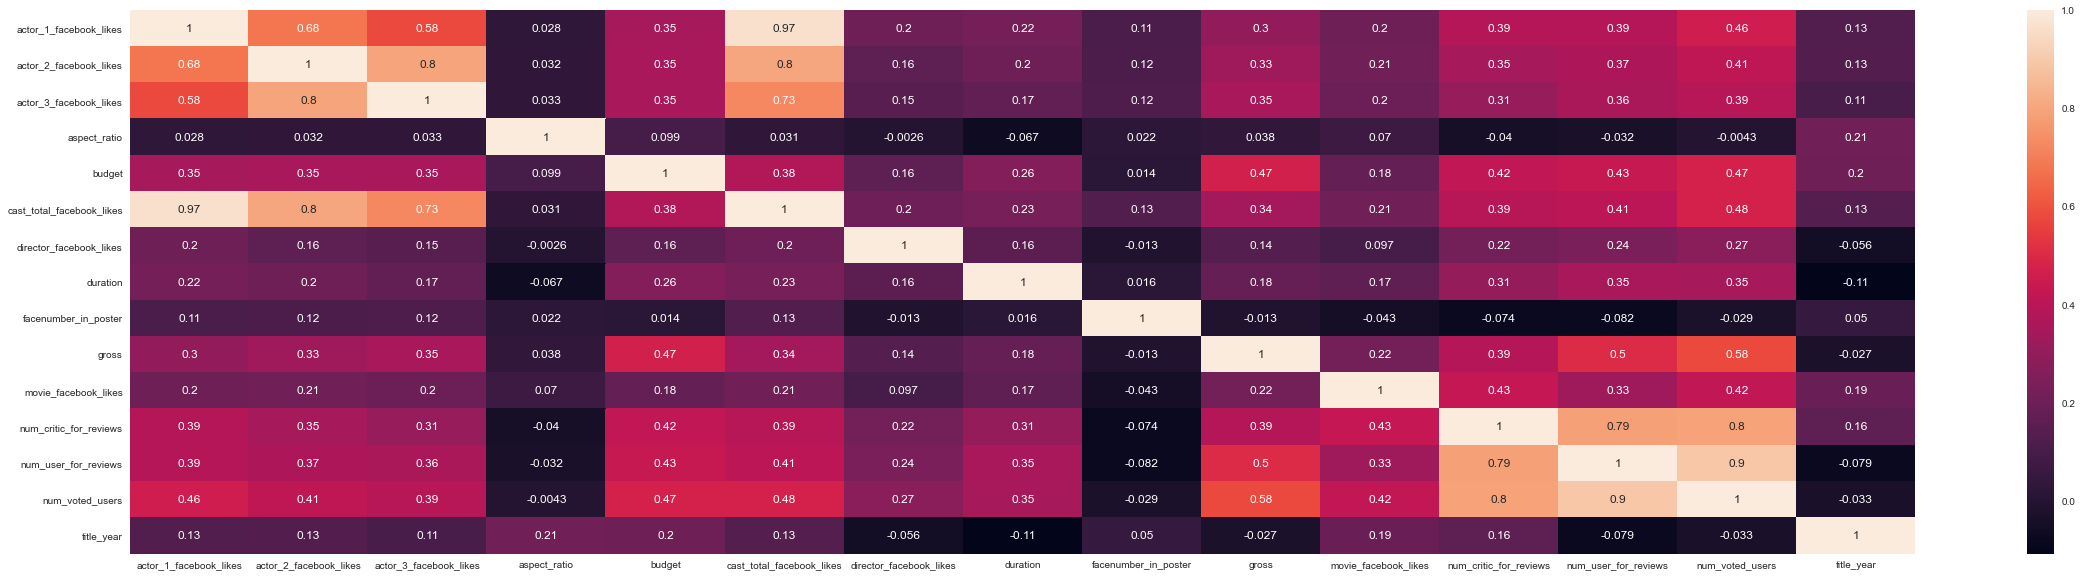

In [440]:
plt.figure(figsize=(40,10))
heatmap = X_train.copy()
heatmap["target"] = y_train
sns.heatmap(heatmap.corr(), annot=True)

From the heatmap, several insights that were gained were
- Cast total facebook likes and number of likes of actor 1 are highly correlated (0.94)
- Number of user for reviews and number of voted users are highly correlated (0.87)
- Number of likes of actor 2 and 3 are somewhat correlated (0.5)
- Total facebook likes of actor are the representative of number of likes of actor 1,2,3

Drop actor 1,2,3 and keep the total actor facebook likes

In [441]:
def drop_actors_likes(X):
    X_copy = X.copy()
    X_copy.drop("actor_1_facebook_likes", axis=1, inplace=True)
    X_copy.drop("actor_2_facebook_likes", axis=1, inplace=True)
    X_copy.drop("actor_3_facebook_likes", axis=1, inplace=True)
    return X_copy
X_train = drop_actors_likes(X_train)
X_test = drop_actors_likes(X_test)
X_test.dtypes

aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes    float64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
gross                        float64
movie_facebook_likes         float64
num_critic_for_reviews       float64
num_user_for_reviews         float64
num_voted_users              float64
title_year                   float64
dtype: object

num_user_for_reviews over num_voted_users

In [442]:
def user_reviews_over_voted(X):
    X_copy = X.copy()
    X_copy["user_reviews_over_voted"] = X_copy["num_user_for_reviews"] / X_copy["num_voted_users"]
    X_copy.drop("num_user_for_reviews", axis=1, inplace=True)
    X_copy.drop("num_voted_users", axis=1, inplace=True)
    return X_copy
X_train = user_reviews_over_voted(X_train)
X_test = user_reviews_over_voted(X_test)
X_train.dtypes

aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes    float64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
gross                        float64
movie_facebook_likes         float64
num_critic_for_reviews       float64
title_year                   float64
user_reviews_over_voted      float64
dtype: object

<AxesSubplot:>

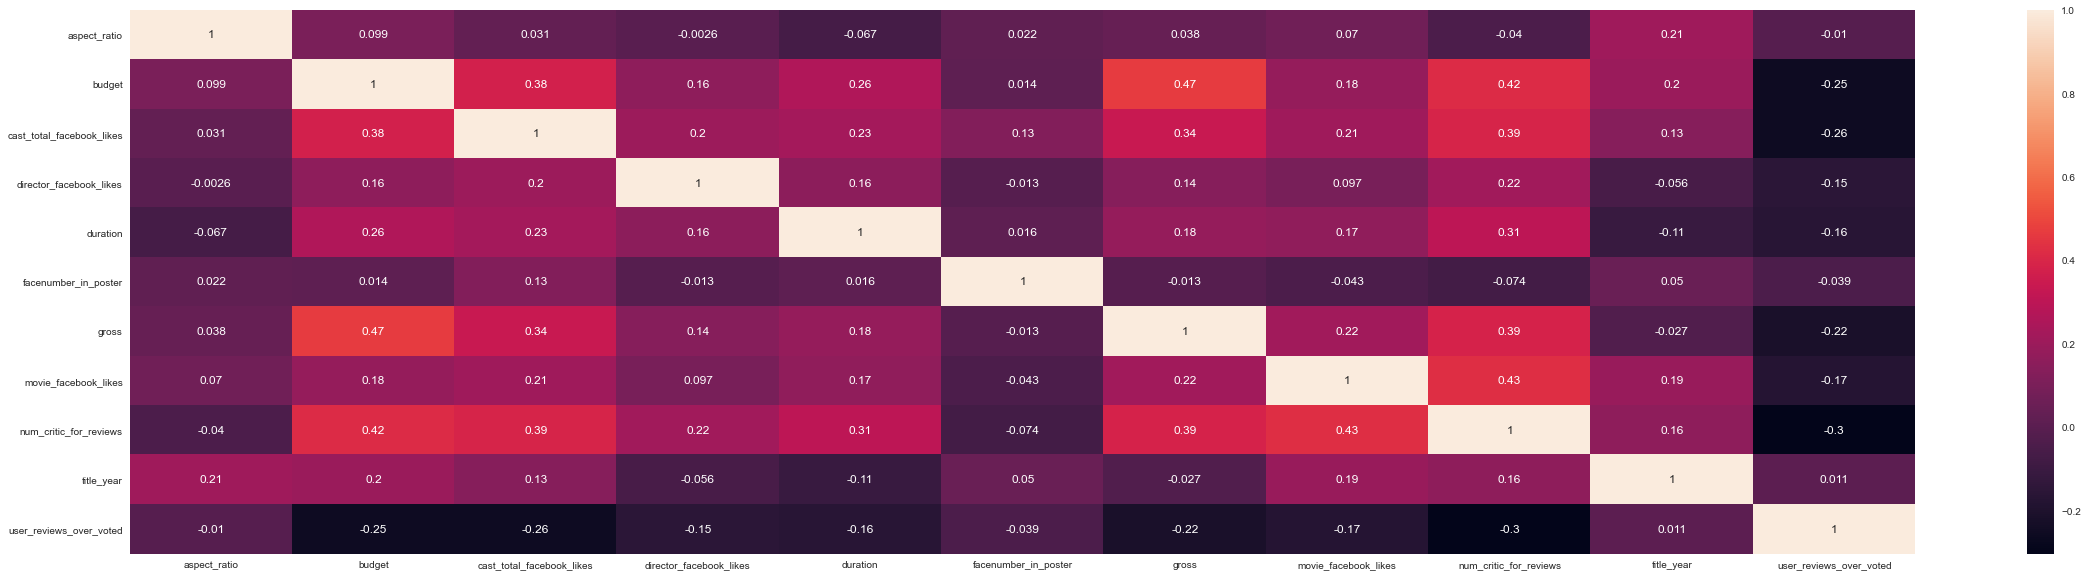

In [443]:
plt.figure(figsize=(40,10))
heatmap = X_train.copy()
heatmap["target"] = y
sns.heatmap(heatmap.corr(), annot=True)

### Encoding

#### Integer to Float

In [444]:
def int_to_float(X):
    X_copy = X.copy()
    int_cols = X_copy.select_dtypes(include=["int"]).columns
    X_copy[int_cols] = X_copy[int_cols].apply(lambda x: x.astype("float"))
    return X_copy
X_train = int_to_float(X_train)
X_test = int_to_float(X_test)
X_train.dtypes


aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes    float64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
gross                        float64
movie_facebook_likes         float64
num_critic_for_reviews       float64
title_year                   float64
user_reviews_over_voted      float64
dtype: object

#### String to One-hot

In [445]:
def one_hot_encode(X):
    X_copy = X.copy()
    cols = X_copy.select_dtypes(include=["object"]).columns
    for col in cols:
        X_copy = pd.concat([X_copy, pd.get_dummies(X_copy[col], prefix=col)], axis=1)
        X_copy.drop(col, axis=1, inplace=True)
    return X_copy
X_train = one_hot_encode(X_train)
X_test = one_hot_encode(X_test)
X_train.dtypes

aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes    float64
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
gross                        float64
movie_facebook_likes         float64
num_critic_for_reviews       float64
title_year                   float64
user_reviews_over_voted      float64
content_rating_PG              uint8
content_rating_PG-13           uint8
content_rating_R               uint8
content_rating_others          uint8
country_France                 uint8
country_UK                     uint8
country_USA                    uint8
country_others                 uint8
dtype: object

In [446]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(np.array(X_train.values, dtype=float), i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                     Features   VIF
18             country_others   inf
12       content_rating_PG-13   inf
17                country_USA   inf
16                 country_UK   inf
15             country_France   inf
14      content_rating_others   inf
13           content_rating_R   inf
11          content_rating_PG   inf
8      num_critic_for_reviews  1.77
1                      budget  1.68
6                       gross  1.57
2   cast_total_facebook_likes  1.47
9                  title_year  1.44
4                    duration  1.30
7        movie_facebook_likes  1.28
10    user_reviews_over_voted  1.18
3     director_facebook_likes  1.10
0                aspect_ratio  1.10
5        facenumber_in_poster  1.05


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


<AxesSubplot:>

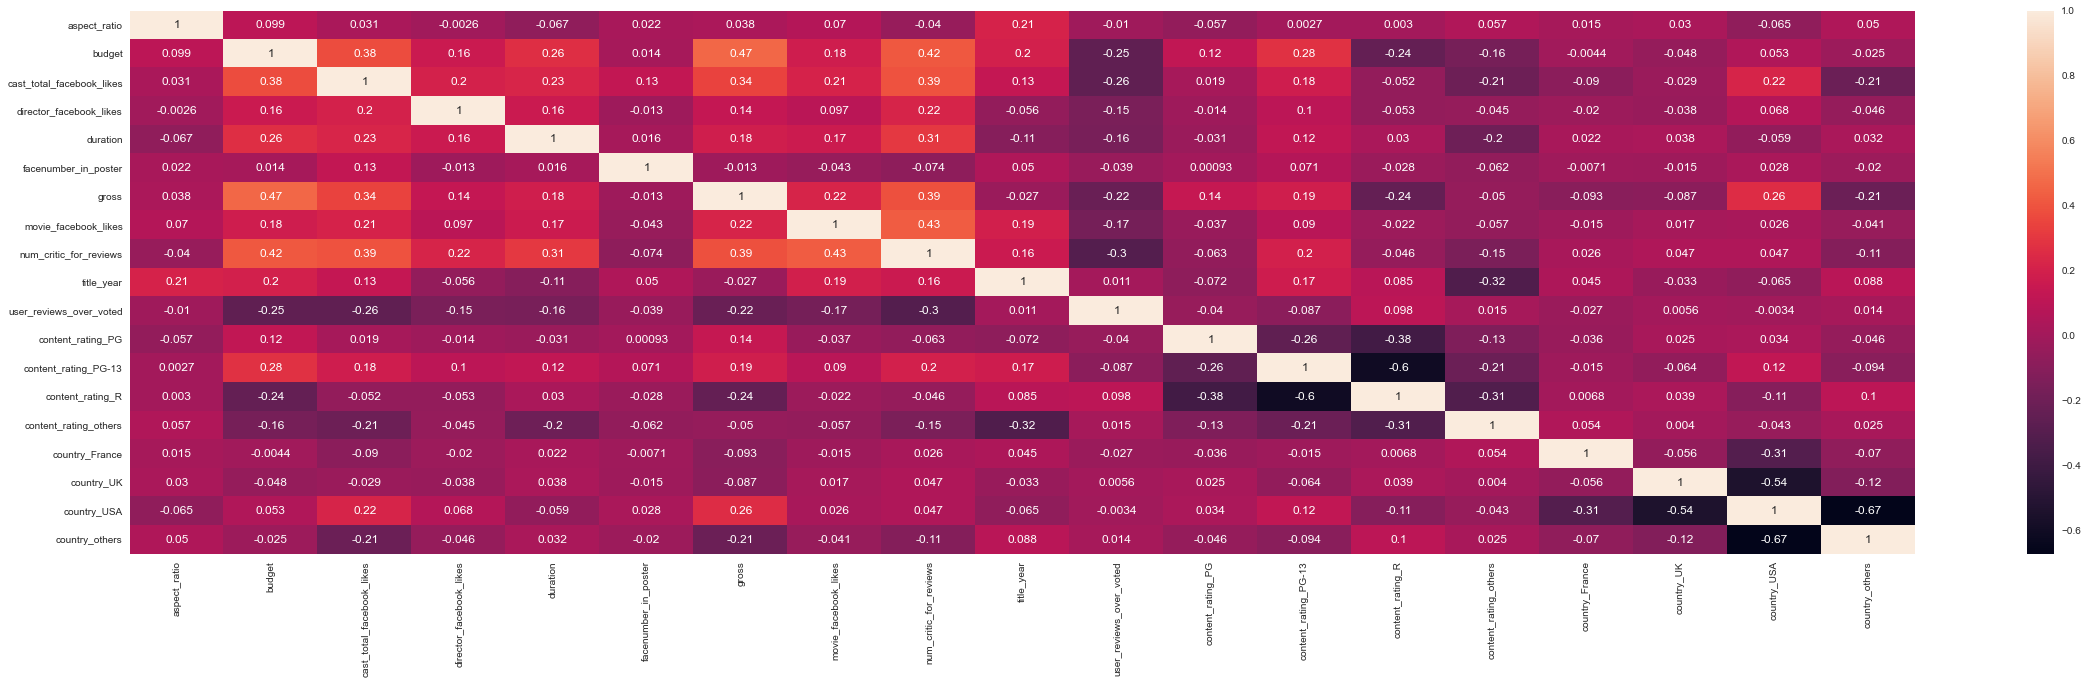

In [447]:
plt.figure(figsize=(40,10))
heatmap = X_train.copy()
heatmap["target"] = y
sns.heatmap(heatmap.corr(), annot=True)

### Normalization

In [448]:
scaler = MinMaxScaler()
scaler = scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

X_train_norm

array([[0.11372988, 0.04242217, 0.15580487, ..., 0.        , 1.        ,
        0.        ],
       [0.09277277, 0.10274693, 0.21498972, ..., 1.        , 0.        ,
        0.        ],
       [0.12546958, 0.25613652, 0.27393342, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.09277277, 0.16356127, 0.20248626, ..., 1.        , 0.        ,
        0.        ],
       [0.12546958, 0.177691  , 0.20866308, ..., 0.        , 1.        ,
        0.        ],
       [0.11372988, 0.29262013, 0.29302824, ..., 0.        , 1.        ,
        0.        ]])

# Model

In [449]:
lr = LogisticRegression()
lr.fit(X_train_norm, y_train)

LogisticRegression()

In [450]:
y_pred=lr.predict(X_test_norm)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,

In [451]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Classification Report: 
               precision    recall  f1-score   support

         low       0.72      0.78      0.75       425
        high       0.74      0.68      0.71       389

    accuracy                           0.73       814
   macro avg       0.73      0.73      0.73       814
weighted avg       0.73      0.73      0.73       814
 

Accuracy on train:   0.721 

Accuracy on test:  0.73 



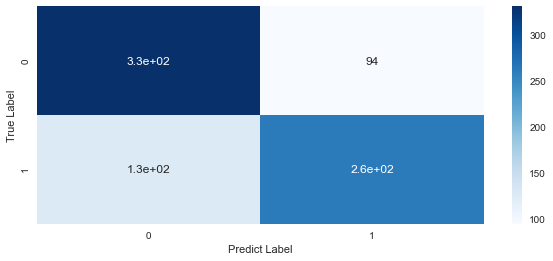

In [452]:
from sklearn import metrics
print("Classification Report: \n", metrics.classification_report(y_test,y_pred, target_names=["low","high"]),'\n')
print("Accuracy on train:  ",lr.score(X_train_norm,y_train).round(3),'\n')
print("Accuracy on test: ",lr.score(X_test_norm,y_test).round(3),'\n')
cf=metrics.confusion_matrix(y_test,y_pred).round(3)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

In [453]:
lr.intercept_

array([0.07163178])

In [454]:
lr.coef_

array([[ 1.44263693, -3.2163056 , -0.88742818,  1.19609022,  3.57283695,
        -0.16940316,  0.58101851,  1.5586178 ,  3.27937247, -3.72225233,
        -0.60768211, -0.25670476, -0.5634313 ,  0.05275909,  0.76490975,
        -0.05925098,  0.46912395, -0.53746645,  0.12512626]])

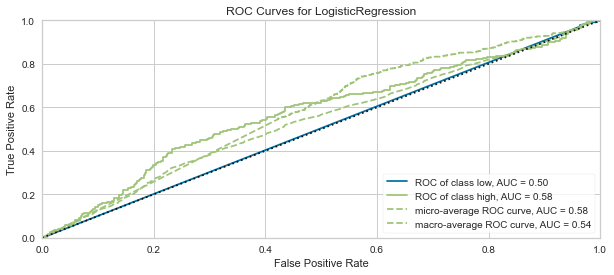

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [455]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(lr, classes=["low","high"])
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_pred)        # Evaluate the model on the test data
visualizer.show()   

In [456]:
lr.intercept_

array([0.07163178])